In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [34]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [35]:
tf.__version__

'2.12.0'

In [36]:
tf.test.is_built_with_cuda()

True

In [37]:
(X_train,Y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [38]:
len(X_train)

50000

In [39]:
X_train.shape

(50000, 32, 32, 3)

In [40]:
x_test.shape

(10000, 32, 32, 3)

In [41]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])

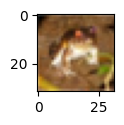

In [42]:
plot_sample(0)

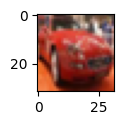

In [43]:
plot_sample(5)

In [44]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [45]:
classes[Y_train[0][0]]

'frog'

In [46]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [47]:
X_train_scaled = X_train/255
x_test_scaled=x_test/255
X_train_scaled[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [48]:
Y_train_categorical = keras.utils.to_categorical(
    Y_train,num_classes=10,dtype='float32'
)
y_test_categorical=keras.utils.to_categorical(
 y_test,num_classes=10,dtype='float32'
)


In [49]:
Y_train_categorical[:9]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(5000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_scaled,Y_train_categorical,epochs=1)

1563/1563 [==============================] - 219s 140ms/step - loss: 1.8086 - accuracy: 0.3536


In [51]:
np.argmax(model.predict(x_test_scaled)[0])

313/313 [==============================] - 13s 42ms/step


1

In [55]:
def get_model():
  model =keras.Sequential([
      keras.layers.Flatten(input_shape=(32,32,3)),
      keras.layers.Dense(3000,activation='relu'),
      keras.layers.Dense(1000,activation='relu'),
      keras.layers.Dense(10,activation='sigmoid')
  ])

  model.compile(optimizer='SGD',
                loss='categorical_crossentropy',
                metrics=['accuracy']
                )
  return model

In [56]:
%timeit -n1,-r1
with tf.device('/CPU:0'):
  cpu_model=get_model()
  cpu_model.fit(X_train_scaled,Y_train_categorical,epochs=1)

1563/1563 [==============================] - 138s 88ms/step - loss: 1.8128 - accuracy: 0.3532


In [57]:
%timeit -n1,-r1
with tf.device('/GPU:0'):
  cpu_model=get_model()
  cpu_model.fit(X_train_scaled,Y_train_categorical,epochs=1)

1563/1563 [==============================] - 131s 83ms/step - loss: 1.8159 - accuracy: 0.3536
